In [1]:
import torchvision
import torch
from torch import nn, optim
from torchsummary import summary
from torch.optim import lr_scheduler
from torchvision import models

from torch.hub import load_state_dict_from_url
from torchvision.models._api import WeightsEnum
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

import pandas as pd

import import_ipynb
import baselines
import data_preparation

importing Jupyter notebook from baselines.ipynb
importing Jupyter notebook from data_preparation.ipynb


Loading data

In [2]:
baselines.seed_torch()
device = data_preparation.device

In [4]:
class_names = data_preparation.class_names
img_datasets = data_preparation.img_datasets
dataloaders = data_preparation.dataloaders
dataset_sizes = data_preparation.dataset_sizes
class_names = data_preparation.class_names

In [5]:
dataset_sizes['test']

389

In [6]:
inputs, classes = next(iter(dataloaders['train']))
inputs.shape

torch.Size([64, 3, 244, 244])

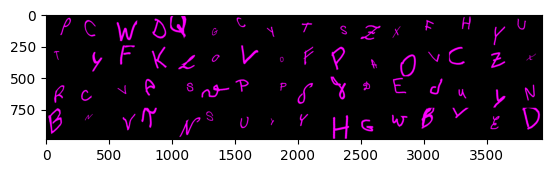

In [6]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs, nrow=16)
baselines.imshow(out)

VGG-16 with one fc layer

In [7]:
vgg_16 = models.vgg16(weights='VGG16_Weights.DEFAULT')

In [8]:
for param in vgg_16.parameters():
    param.requires_grad = False

num_features = 25088
vgg_16.classifier = nn.Sequential(
    nn.Linear(num_features, 26),
    nn.Softmax(dim=-1))
vgg_16 = vgg_16.cuda()

In [9]:
summary(vgg_16, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 244, 244]           1,792
              ReLU-2         [-1, 64, 244, 244]               0
            Conv2d-3         [-1, 64, 244, 244]          36,928
              ReLU-4         [-1, 64, 244, 244]               0
         MaxPool2d-5         [-1, 64, 122, 122]               0
            Conv2d-6        [-1, 128, 122, 122]          73,856
              ReLU-7        [-1, 128, 122, 122]               0
            Conv2d-8        [-1, 128, 122, 122]         147,584
              ReLU-9        [-1, 128, 122, 122]               0
        MaxPool2d-10          [-1, 128, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]         295,168
             ReLU-12          [-1, 256, 61, 61]               0
           Conv2d-13          [-1, 256, 61, 61]         590,080
             ReLU-14          [-1, 256,

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_16.classifier.parameters(), lr=1e-3)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [11]:
vgg16_trained, vgg16_losses, vgg16_accuracies, vgg16_roc_aucs = baselines.train(vgg_16, loss_fn, optimizer, lr_scheduler, dataloaders, dataset_sizes, num_epochs=25, savename='vgg16.1')

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 21.0m 50.2709s
Best val Acc: 0.6807
Best val Roc-Auc: 0.9510


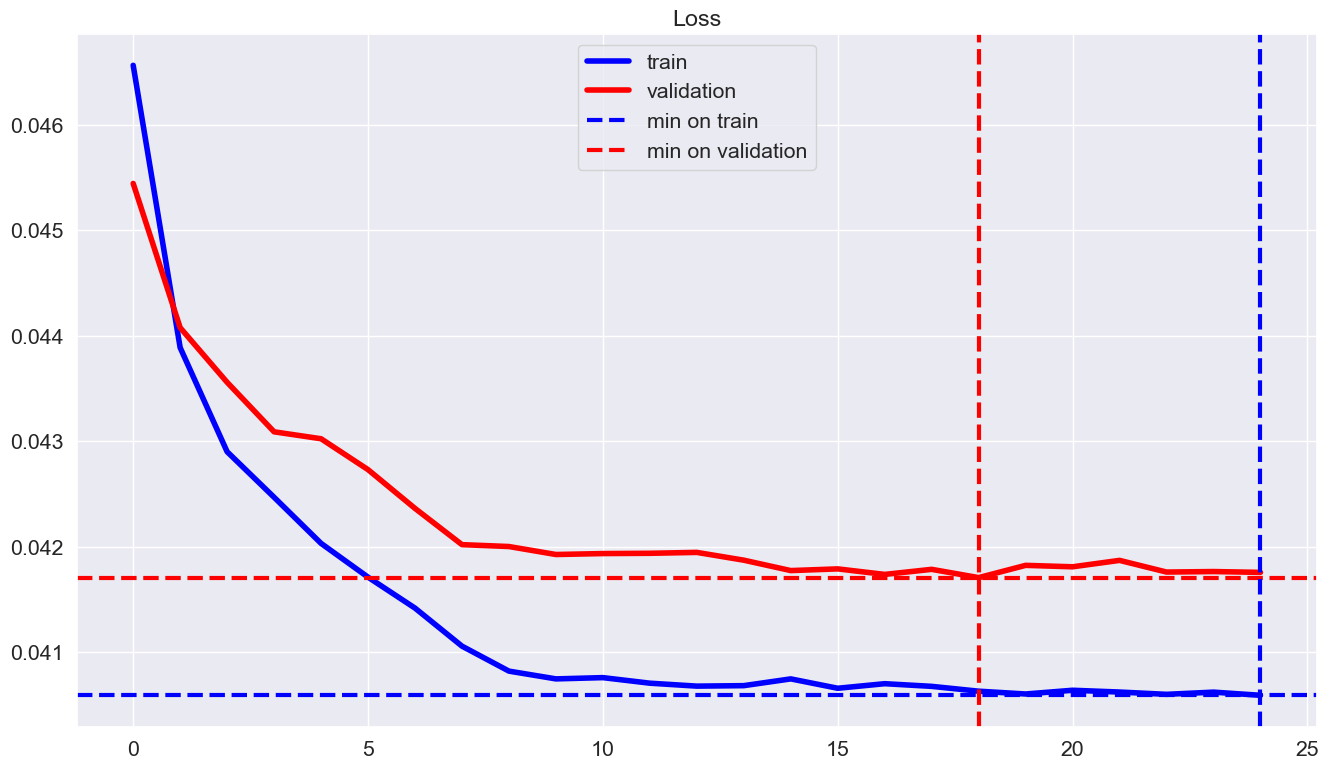

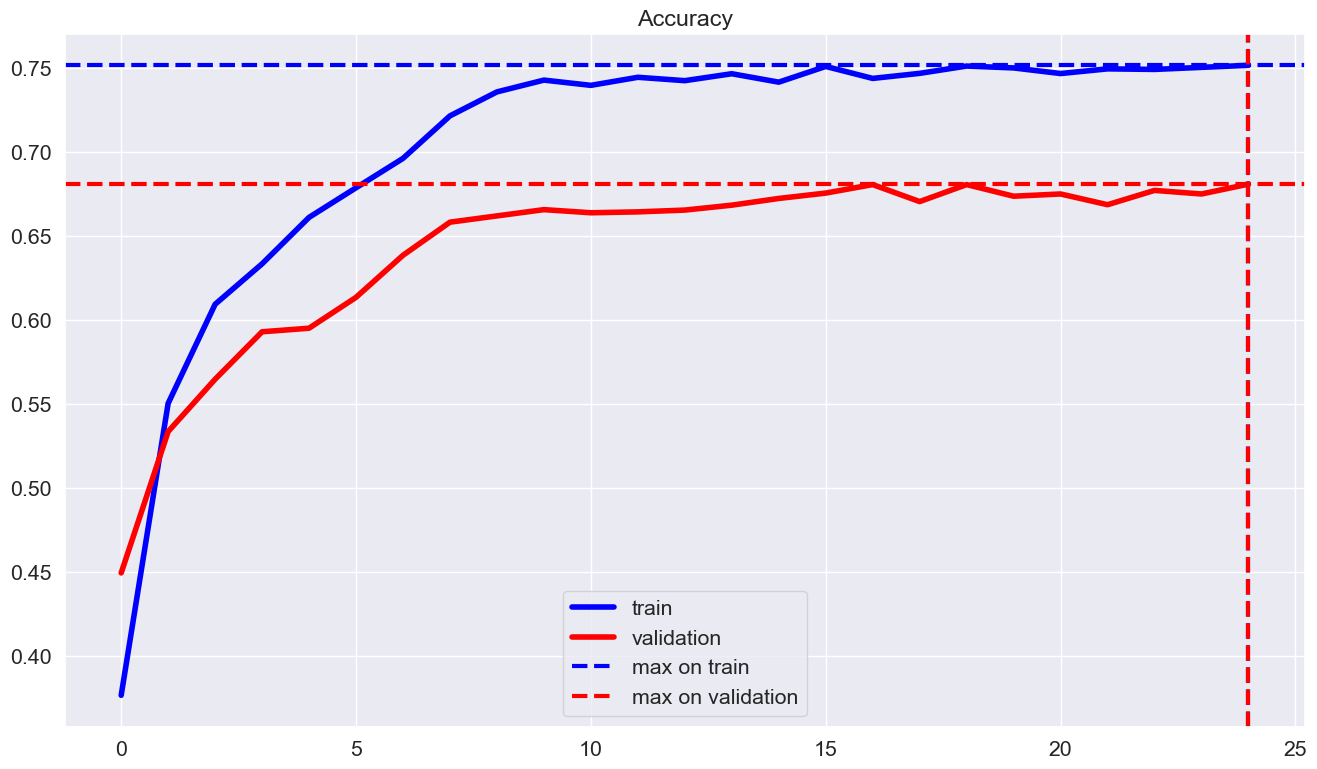

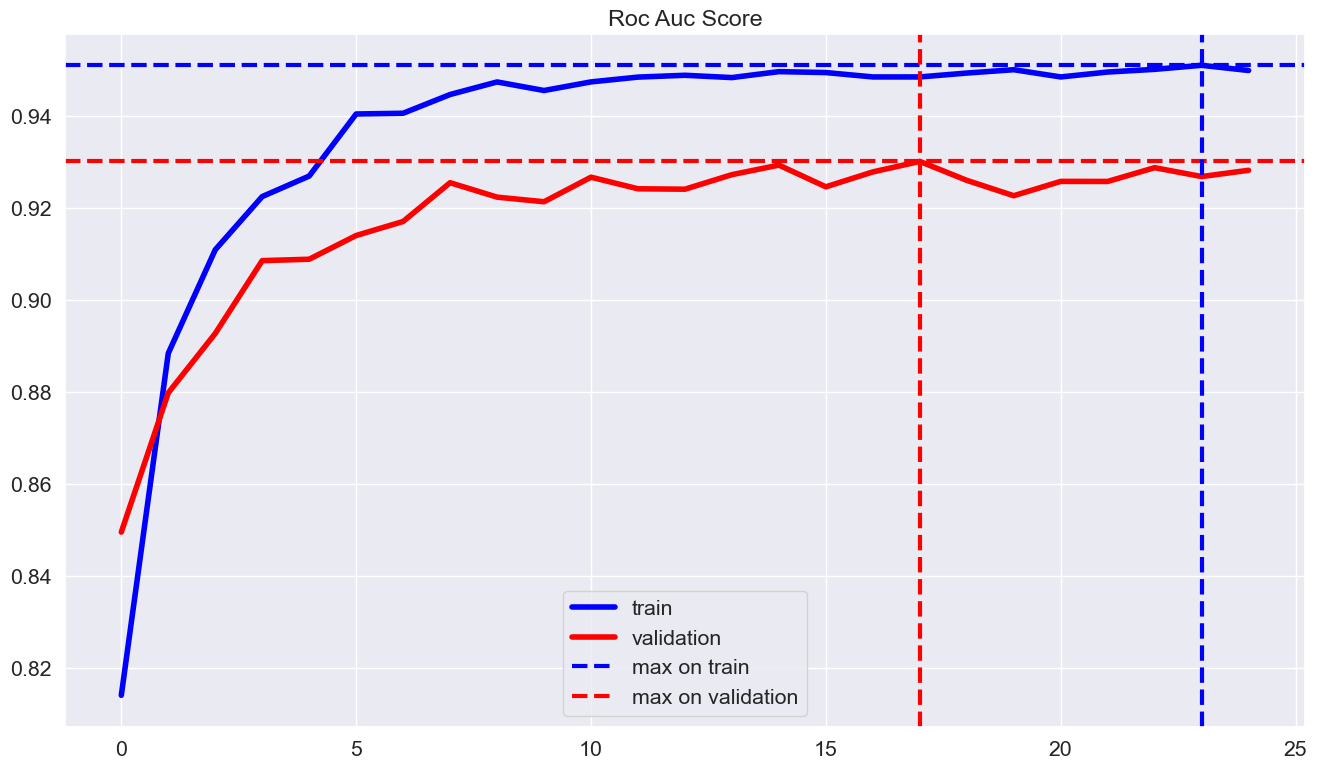

In [12]:
baselines.train_plot(vgg16_losses, vgg16_accuracies, vgg16_roc_aucs)

In [13]:
baselines.evaluate(vgg16_trained, dataloaders['test'])

(0.7076923076923077, 0.9291692307692309)

In [14]:
torch.cuda.empty_cache()

RESNET 34

In [15]:
from torch.optim import lr_scheduler

In [16]:
resnet_34 = models.resnet34(weights='ResNet34_Weights.IMAGENET1K_V1')

In [17]:
resnet_34

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [18]:
cnt = 0
for child in resnet_34.children():
    if cnt < 7:
        for param in child.parameters():
            param.requires_grad = False
    cnt += 1

# only one linear layer
num_features = 512
resnet_34.fc = nn.Sequential(
    nn.Linear(num_features, 26),
    nn.Softmax(dim=-1))

resnet_34 = resnet_34.cuda()

In [19]:
summary(resnet_34, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]          36,864
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
       BasicBlock-11           [-1, 64, 61, 61]               0
           Conv2d-12           [-1, 64, 61, 61]          36,864
      BatchNorm2d-13           [-1, 64, 61, 61]             128
             ReLU-14           [-1, 64,

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_34.parameters(), lr=1e-3)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [21]:
r34_trained, r34_losses, r34_accuracies, r34_roc_aucs = baselines.train(resnet_34, loss_fn, optimizer, lr_scheduler, dataloaders, dataset_sizes, num_epochs=25, savename='resnet34')

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 12.0m 50.1792s
Best val Acc: 0.8495
Best val Roc-Auc: 0.9934


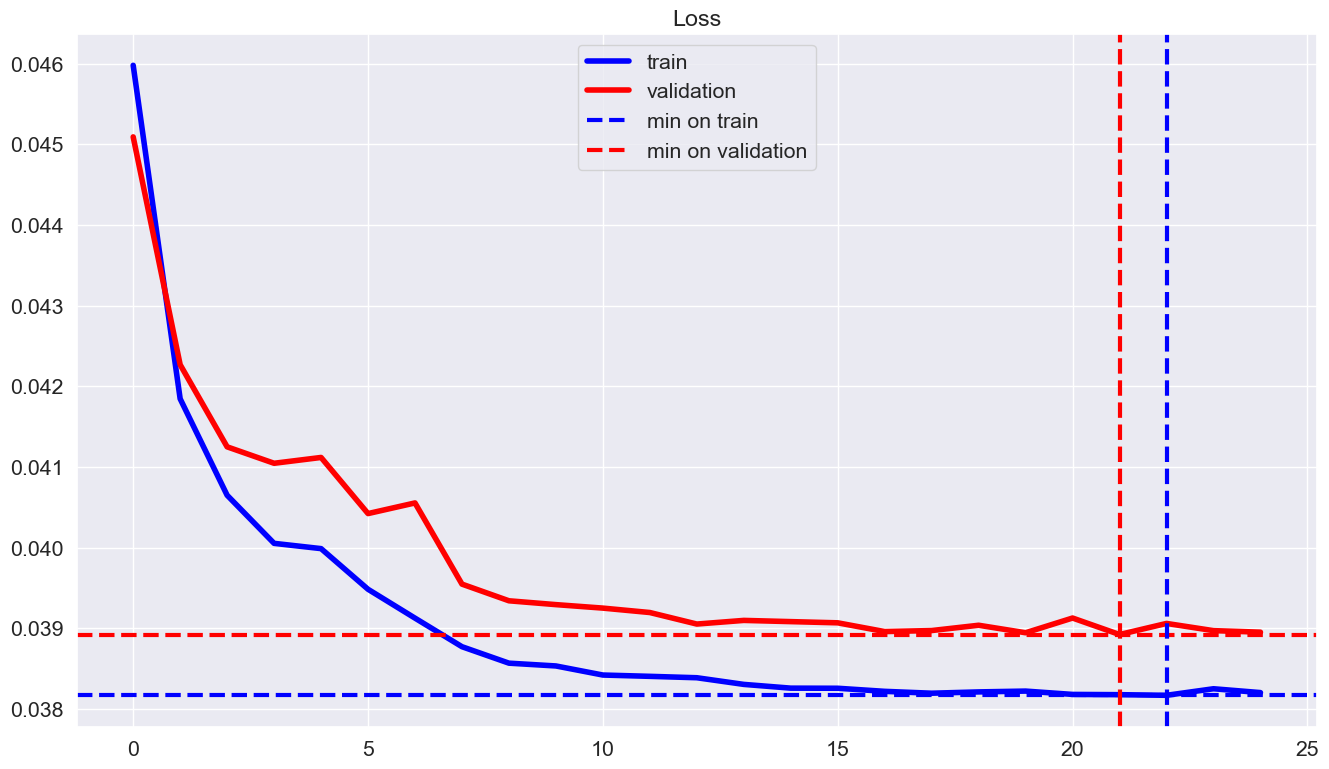

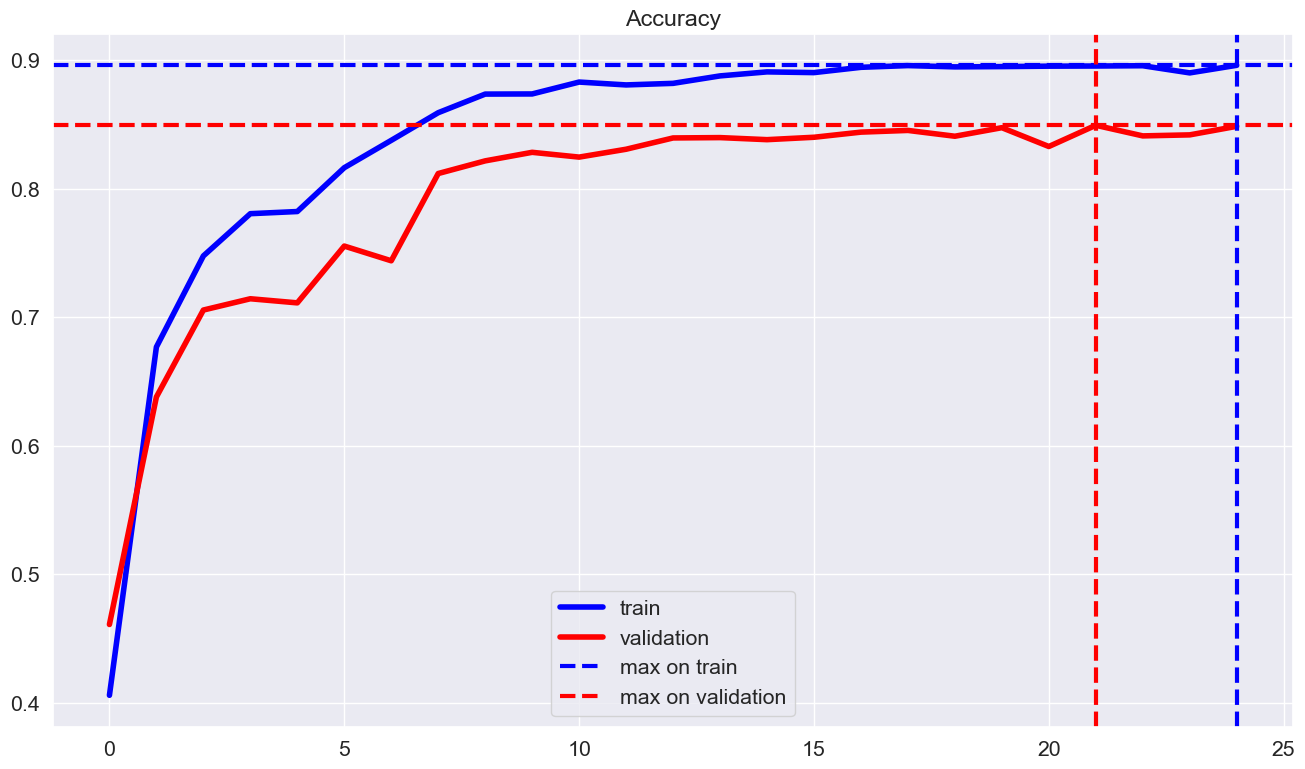

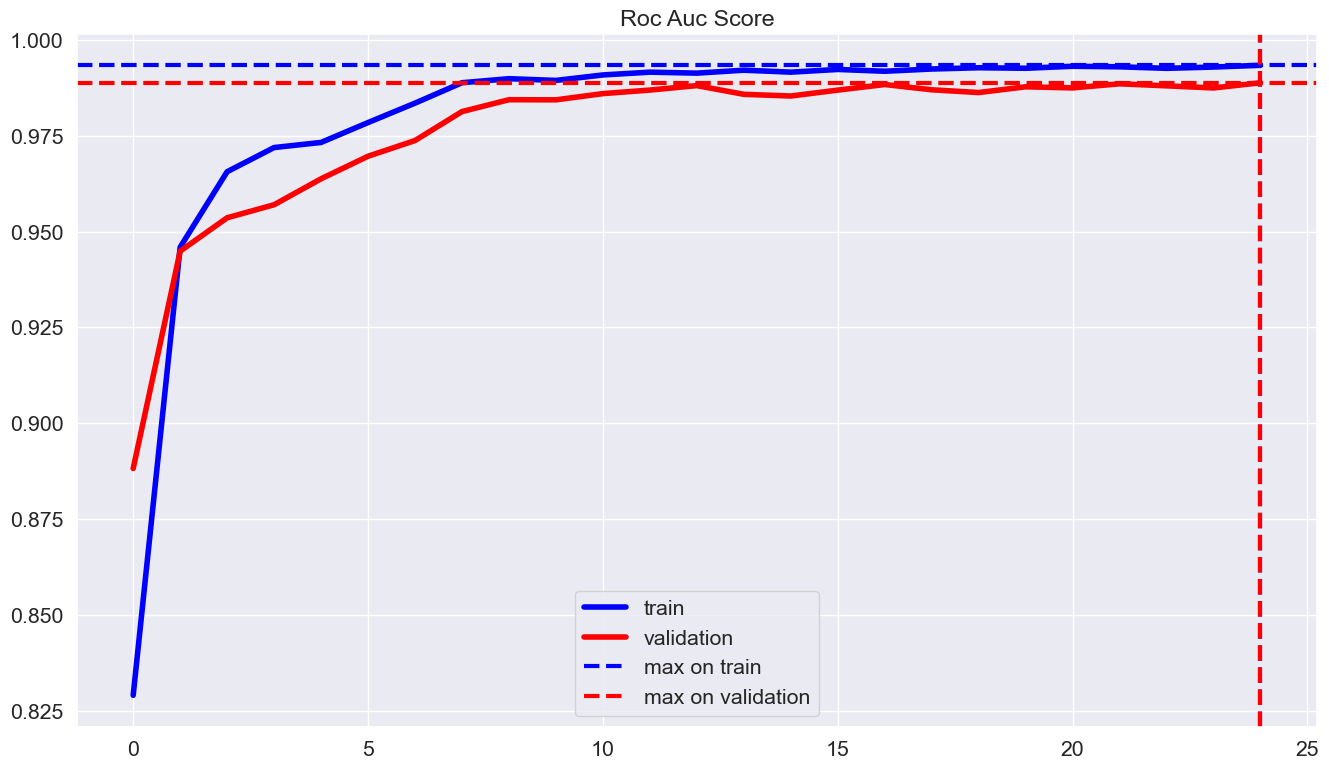

In [22]:
baselines.train_plot(r34_losses, r34_accuracies, r34_roc_aucs)

In [23]:
baselines.evaluate(r34_trained, dataloaders['test'])

(0.9461538461538461, 0.9992)

In [24]:
torch.cuda.empty_cache()

EfficientNet

In [25]:
from torch.optim import lr_scheduler

In [26]:
def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

effnet_b0 = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

In [27]:
effnet_b0

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [28]:
cnt = 0
for child in effnet_b0.features.children():
    if cnt < 6:
        for param in child.parameters():
            param.requires_grad = False
    cnt += 1


num_features = 1280
effnet_b0.classifier = nn.Sequential(
    nn.Linear(num_features, 26),
    nn.Softmax(dim=-1))

effnet_b0 = effnet_b0.cuda()

In [29]:
summary(effnet_b0, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 122, 122]             864
       BatchNorm2d-2         [-1, 32, 122, 122]              64
              SiLU-3         [-1, 32, 122, 122]               0
            Conv2d-4         [-1, 32, 122, 122]             288
       BatchNorm2d-5         [-1, 32, 122, 122]              64
              SiLU-6         [-1, 32, 122, 122]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 122, 122]               0
           Conv2d-13         [-1, 16, 122, 122]             512
      BatchNorm2d-14         [-1, 16, 1

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(effnet_b0.parameters(), lr=1e-3)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [31]:
efb0_trained, efb0_losses, efb0_accuracies, efb0_roc_aucs = baselines.train(effnet_b0, loss_fn, optimizer, lr_scheduler, dataloaders, dataset_sizes, num_epochs=25, savename='effnet_b0')

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 13.0m 1.8297s
Best val Acc: 0.8826
Best val Roc-Auc: 0.9959


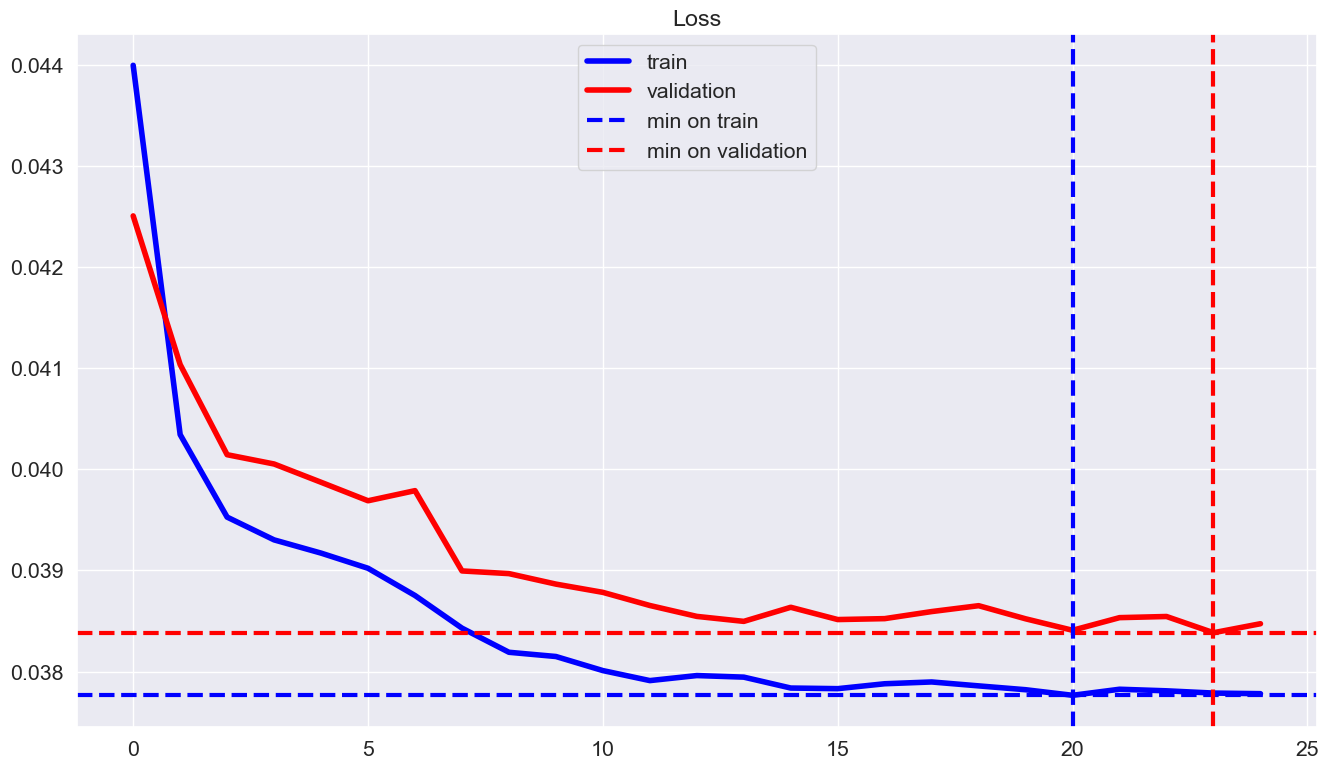

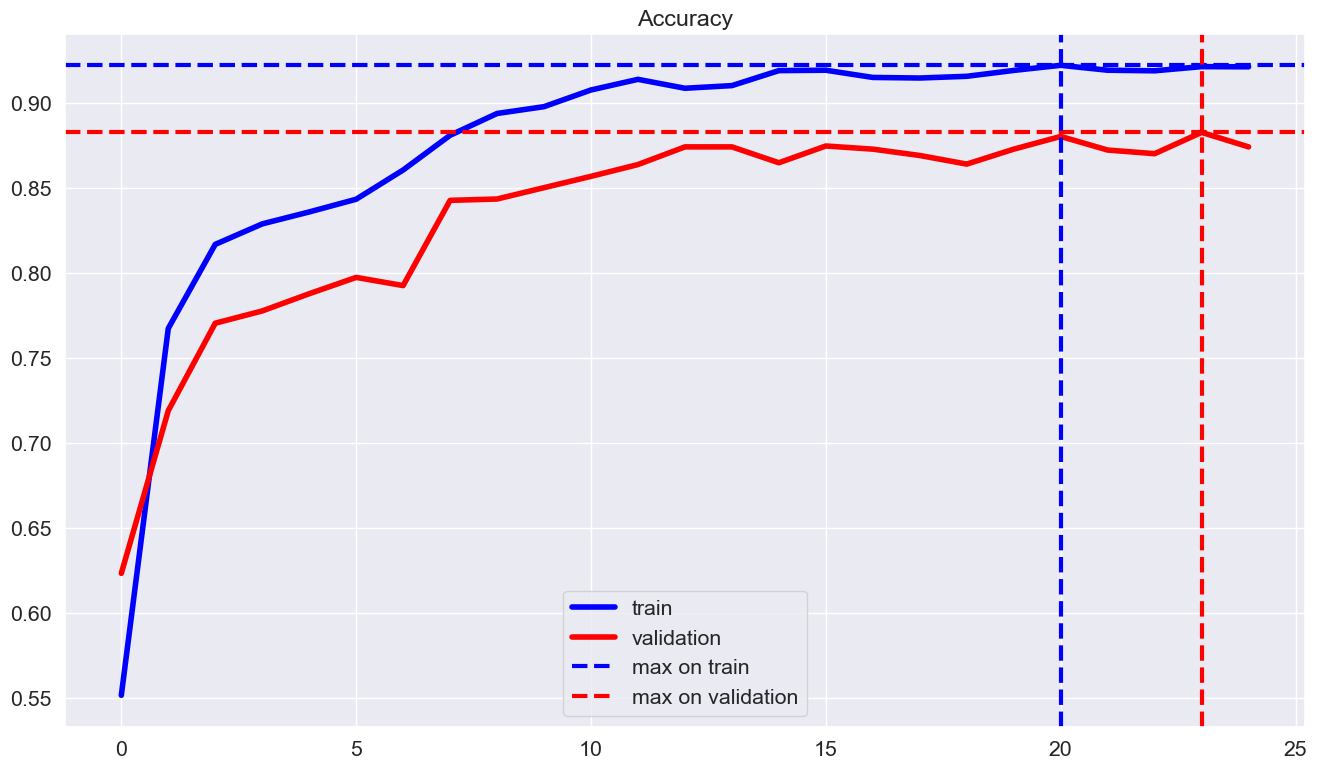

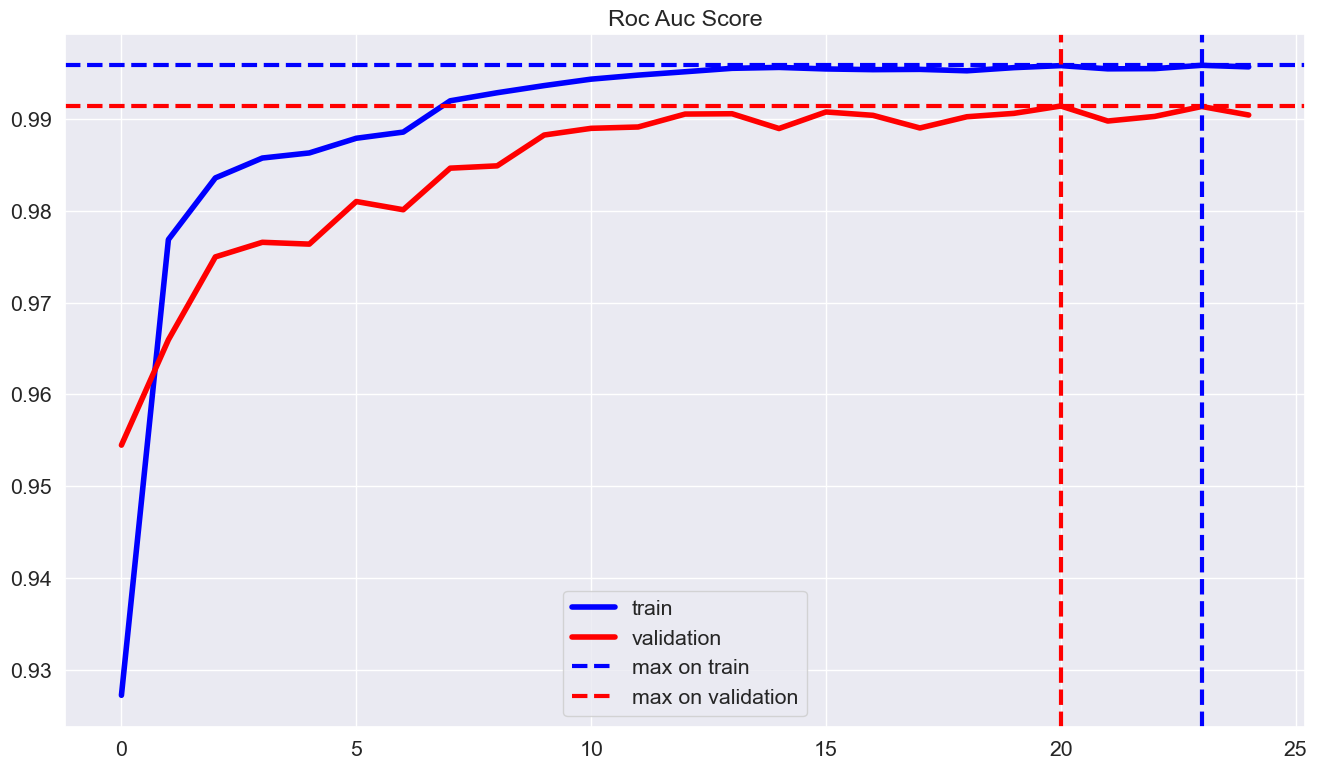

In [32]:
baselines.train_plot(efb0_losses, efb0_accuracies, efb0_roc_aucs)

In [33]:
baselines.evaluate(efb0_trained, dataloaders['test'])

(0.9846153846153847, 1.0)

In [34]:
torch.cuda.empty_cache()

EFFICIENTNET_v2

In [35]:
from torch.optim import lr_scheduler

In [36]:
efficient_v2 = models.efficientnet_v2_s(weights='EfficientNet_V2_S_Weights.IMAGENET1K_V1')

In [37]:
efficient_v2

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [38]:
cnt = 0
for child in efficient_v2.features.children():
    if cnt < 6:
        for param in child.parameters():
            param.requires_grad = False
    cnt += 1


num_features = 1280
efficient_v2.classifier = nn.Sequential(
    nn.Linear(num_features, 26),
    nn.Softmax(dim=-1))

efficient_v2 = efficient_v2.cuda()

In [39]:
summary(efficient_v2, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 122, 122]             648
       BatchNorm2d-2         [-1, 24, 122, 122]              48
              SiLU-3         [-1, 24, 122, 122]               0
            Conv2d-4         [-1, 24, 122, 122]           5,184
       BatchNorm2d-5         [-1, 24, 122, 122]              48
              SiLU-6         [-1, 24, 122, 122]               0
   StochasticDepth-7         [-1, 24, 122, 122]               0
       FusedMBConv-8         [-1, 24, 122, 122]               0
            Conv2d-9         [-1, 24, 122, 122]           5,184
      BatchNorm2d-10         [-1, 24, 122, 122]              48
             SiLU-11         [-1, 24, 122, 122]               0
  StochasticDepth-12         [-1, 24, 122, 122]               0
      FusedMBConv-13         [-1, 24, 122, 122]               0
           Conv2d-14           [-1, 96,

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(efficient_v2.parameters(), lr=1e-3)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [41]:
efv2_trained, efv2_losses, efv2_accuracies, efv2_roc_aucs = baselines.train(efficient_v2, loss_fn, optimizer, lr_scheduler, dataloaders, dataset_sizes, num_epochs=25, savename='efficient_v2')

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 21.0m 17.1625s
Best val Acc: 0.8834
Best val Roc-Auc: 0.9955


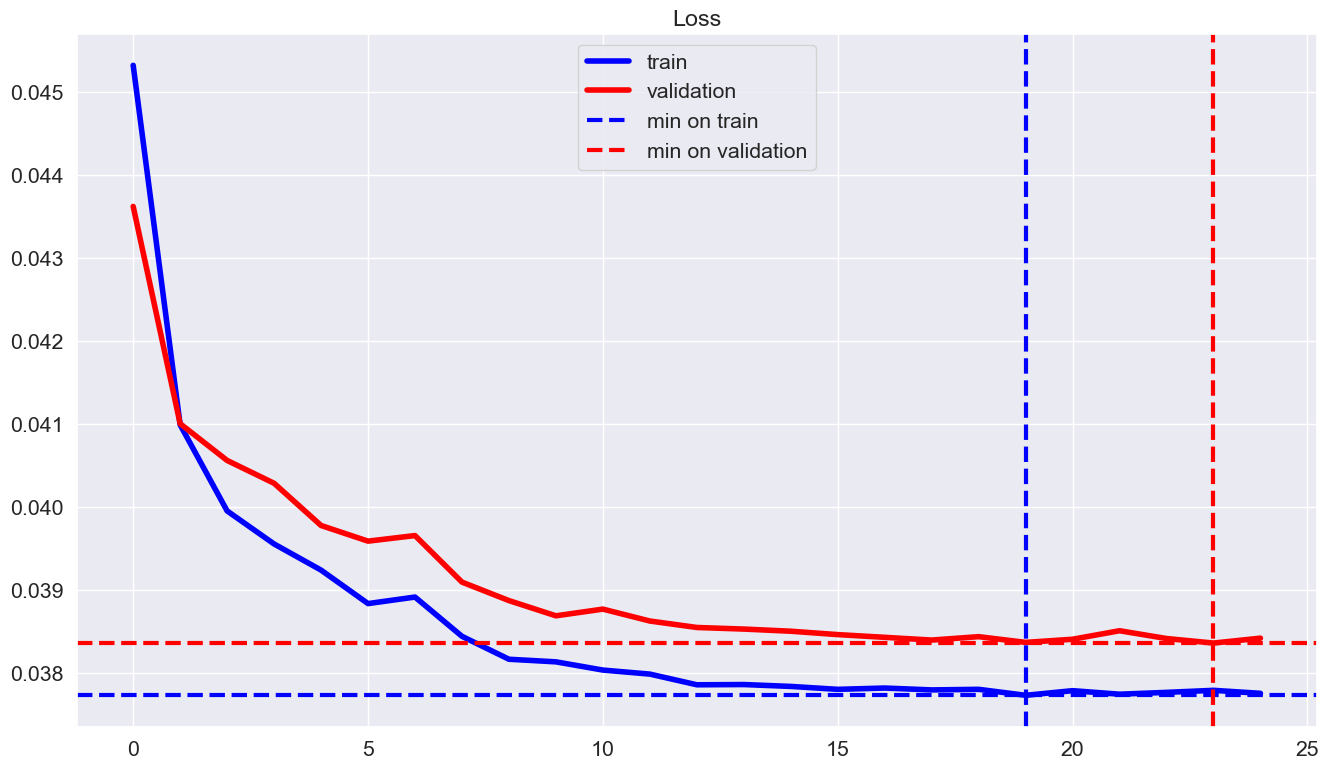

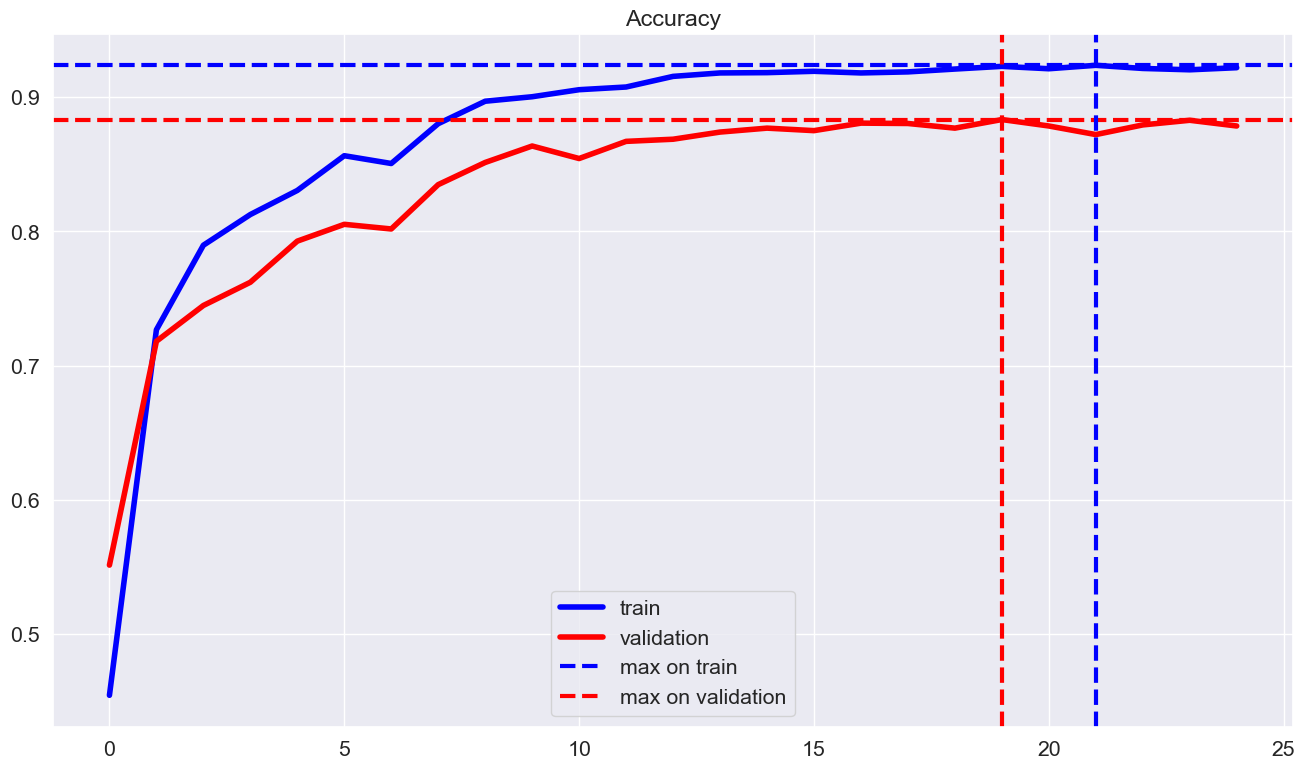

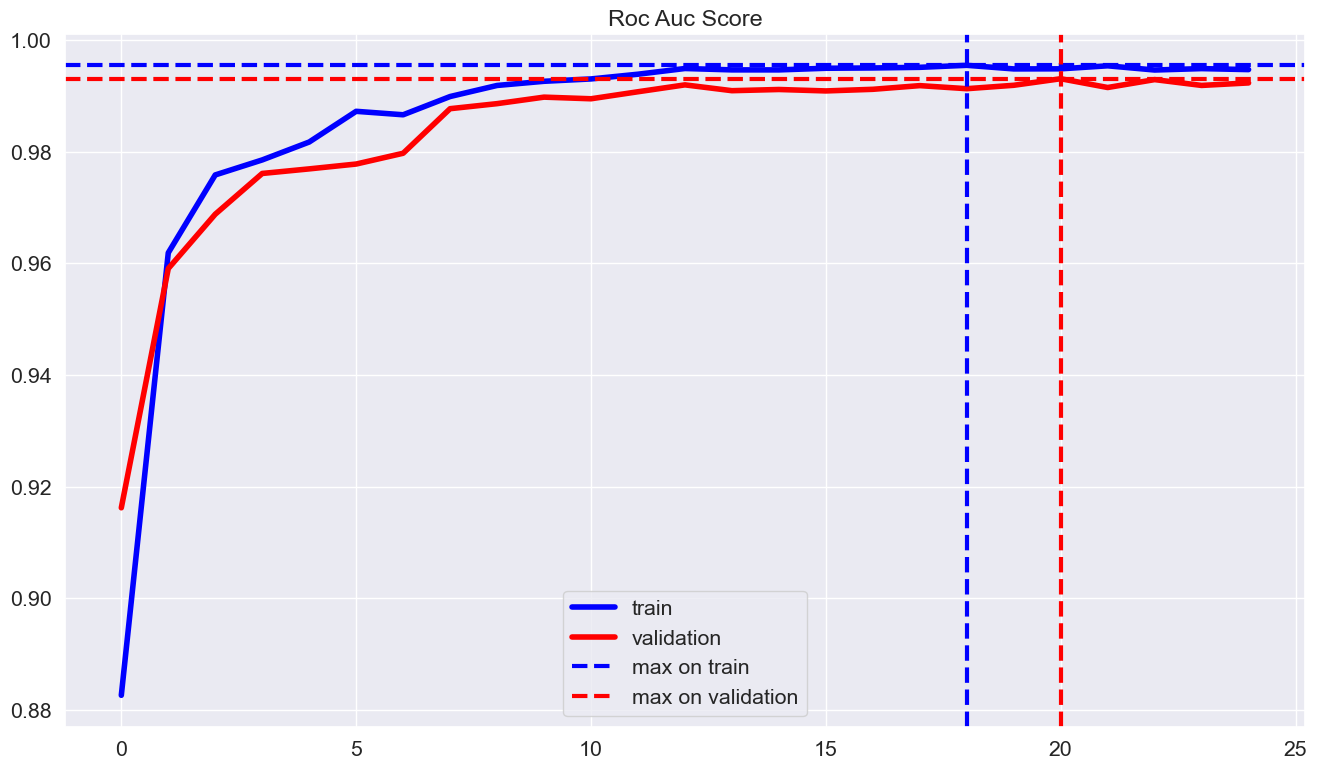

In [42]:
baselines.train_plot(efv2_losses, efv2_accuracies, efv2_roc_aucs)

In [43]:
baselines.evaluate(efv2_trained, dataloaders['test'])

(0.9769230769230769, 0.9958153846153845)

In [44]:
torch.cuda.empty_cache()

MOBILENET

In [45]:
from torch.optim import lr_scheduler

In [46]:
mobile_v3 = models.mobilenet_v3_large(weights='MobileNet_V3_Large_Weights.IMAGENET1K_V2')

In [47]:
mobile_v3

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [48]:
cnt = 0
for child in mobile_v3.features.children():
    if cnt < 13:
        for param in child.parameters():
            param.requires_grad = False
    cnt += 1

num_features = 960
mobile_v3.classifier = nn.Sequential(
    nn.Linear(num_features, 26),
    nn.Softmax(dim=-1))

mobile_v3 = mobile_v3.cuda()

In [49]:
summary(mobile_v3, (3, 244, 244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 122, 122]             432
       BatchNorm2d-2         [-1, 16, 122, 122]              32
         Hardswish-3         [-1, 16, 122, 122]               0
            Conv2d-4         [-1, 16, 122, 122]             144
       BatchNorm2d-5         [-1, 16, 122, 122]              32
              ReLU-6         [-1, 16, 122, 122]               0
            Conv2d-7         [-1, 16, 122, 122]             256
       BatchNorm2d-8         [-1, 16, 122, 122]              32
  InvertedResidual-9         [-1, 16, 122, 122]               0
           Conv2d-10         [-1, 64, 122, 122]           1,024
      BatchNorm2d-11         [-1, 64, 122, 122]             128
             ReLU-12         [-1, 64, 122, 122]               0
           Conv2d-13           [-1, 64, 61, 61]             576
      BatchNorm2d-14           [-1, 64,

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobile_v3.parameters(), lr=1e-3)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [51]:
mob3_trained, mob3_losses, mob3_accuracies, mob3_roc_aucs = baselines.train(mobile_v3, loss_fn, optimizer, lr_scheduler, dataloaders, dataset_sizes, num_epochs=25, savename='mobile_v3')

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

train iter:   0%|          | 0/141 [00:00<?, ?it/s]

val iter:   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 10.0m 53.2816s
Best val Acc: 0.8493
Best val Roc-Auc: 0.9953


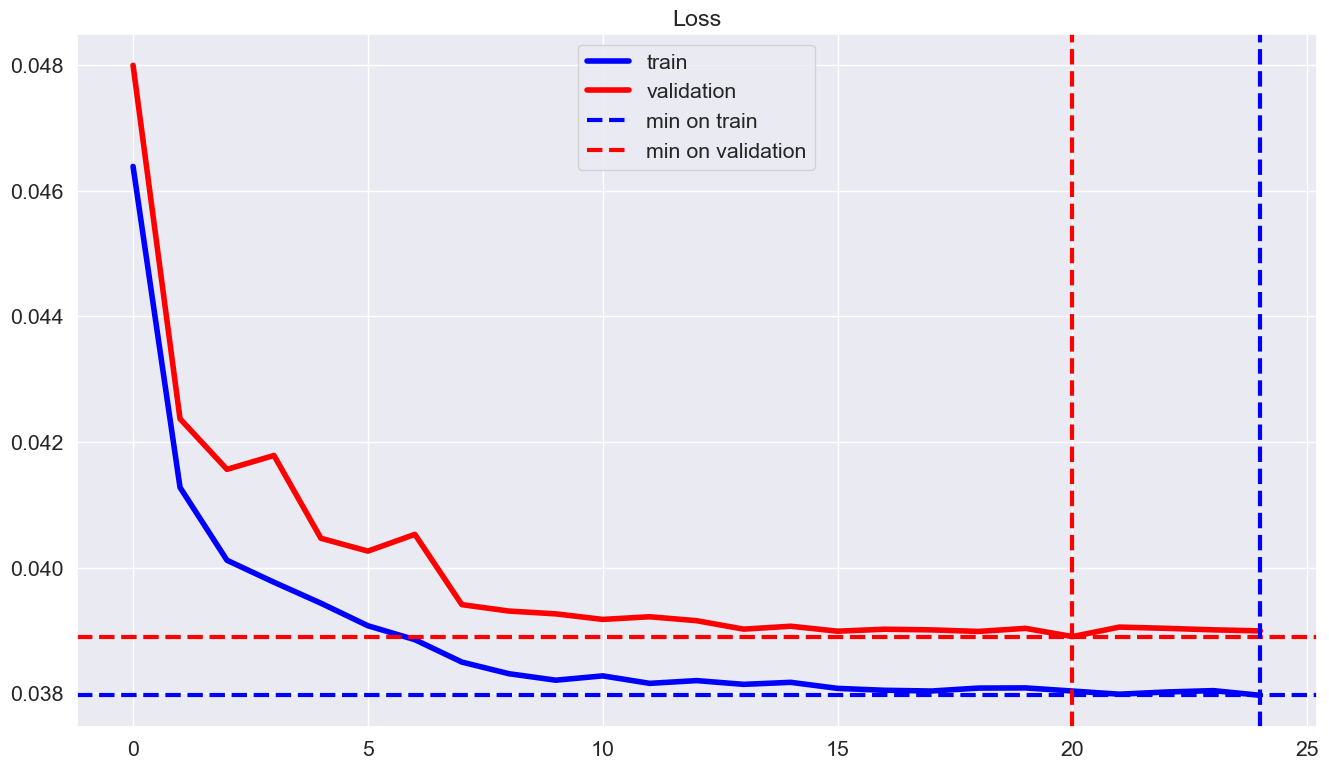

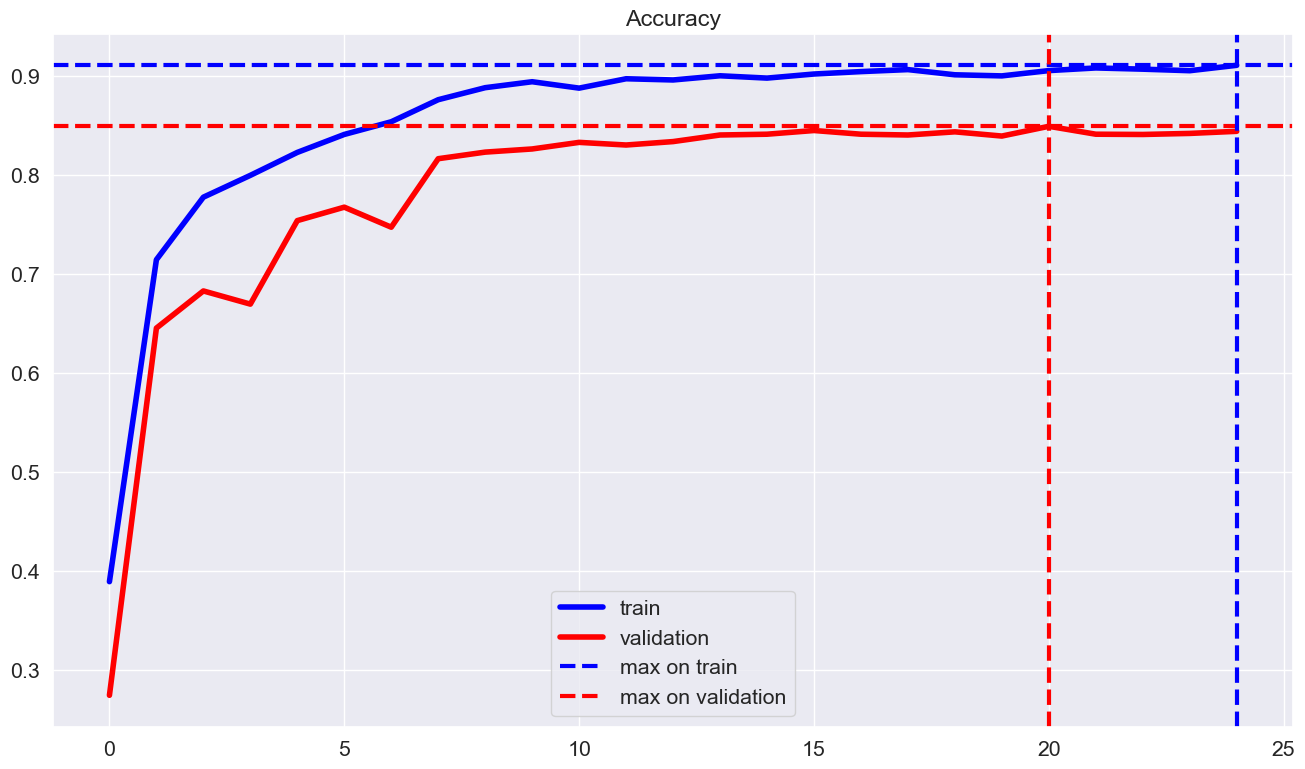

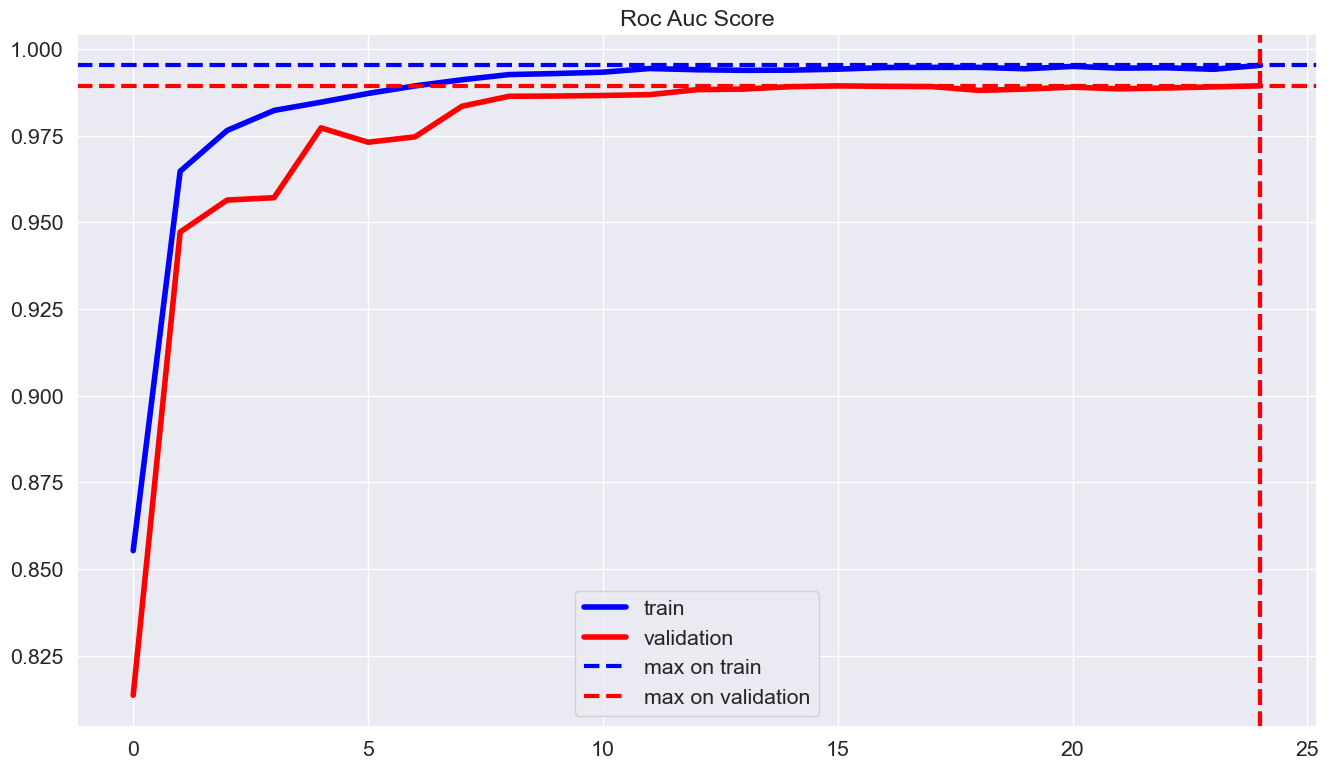

In [52]:
baselines.train_plot(mob3_losses, mob3_accuracies, mob3_roc_aucs)

In [53]:
baselines.evaluate(mob3_trained, dataloaders['test'])

(0.9230769230769231, 0.9967384615384616)

In [54]:
torch.cuda.empty_cache()

SUMMARY

In [7]:
param_names = ['vgg_acc', 'vgg_loss', 'vgg_aucs', 'res_acc', 'res_loss', 'res_aucs', 'ef0_acc', 'ef0_loss', 'ef0_aucs', 'efv2_acc', 'efv2_loss', 'efv2_aucs', 'mob_acc', 'mob_loss', 'mob_aucs']
model_names = ['VGG-16', 'Resnet-34', 'EfficientNet.b0', 'EfficientNet.v2', 'Mobilenet.v3']

In [56]:
train_dicts = [
    vgg16_accuracies, vgg16_losses, vgg16_roc_aucs,
    r34_accuracies, r34_losses, r34_roc_aucs,
    efb0_accuracies, efb0_losses, efb0_roc_aucs,
    efv2_accuracies, efv2_losses, efv2_roc_aucs,
    mob3_accuracies, mob3_losses, mob3_roc_aucs
]
baselines.save(train_dicts, file_names=param_names)

In [8]:
vgg_accuracies, vgg_losses, vgg_aucs, res_accuracies, res_losses, res_aucs, ef0_accuracies, ef0_losses, ef0_aucs, ef2_accuracies, ef2_losses, ef2_aucs, mob_accuracies, mob_losses, mob_aucs = baselines.load(param_names)

In [9]:
best_accs = []
best_losses = []
best_aucs = []
accs = [vgg_accuracies, res_accuracies, ef0_accuracies, ef2_accuracies, mob_accuracies]
losses = [vgg_losses, res_losses, ef0_losses, ef2_losses, mob_losses]
aucs = [vgg_aucs, res_aucs, ef0_aucs, ef2_aucs, mob_aucs]
for model in accs:
    best_accs.append(max(model['val']))

for model in losses:
    best_losses.append(min(model['val']))

for model in aucs:
    best_aucs.append(max(model['val']))

In [10]:

summary = pd.DataFrame({
    'Model Name': model_names,
    'Estimated size (MB)': [317.62, 199.61, 229.14, 484.91, 141.59],
    'Best val accuracy': best_accs,
    'Best val roc-auc': best_aucs,
    'Best val loss': best_losses,
    'Test accuracy': [0.753, 0.899, 0.966, 0.992, 0.915],
    'Test roc-auc': [0.969, 0.996, 0.989, 0.995, 0.998],
    'Best epoch': [19, 21, 17, 18, 22]
})
summary

,Model Name,Estimated size (MB),Best val accuracy,Best val roc-auc,Best val loss,Test accuracy,Test roc-auc,Best epoch
0,VGG-16,317.62,0.680692,0.930109,0.041705,0.753,0.969,19
1,Resnet-34,199.61,0.849534,0.988854,0.038924,0.899,0.996,21
2,EfficientNet.b0,229.14,0.882557,0.991420,0.038384,0.966,0.989,17
3,EfficientNet.v2,484.91,0.883356,0.993073,0.038357,0.992,0.995,18
4,Mobilenet.v3,141.59,0.849268,0.989379,0.038904,0.915,0.998,22


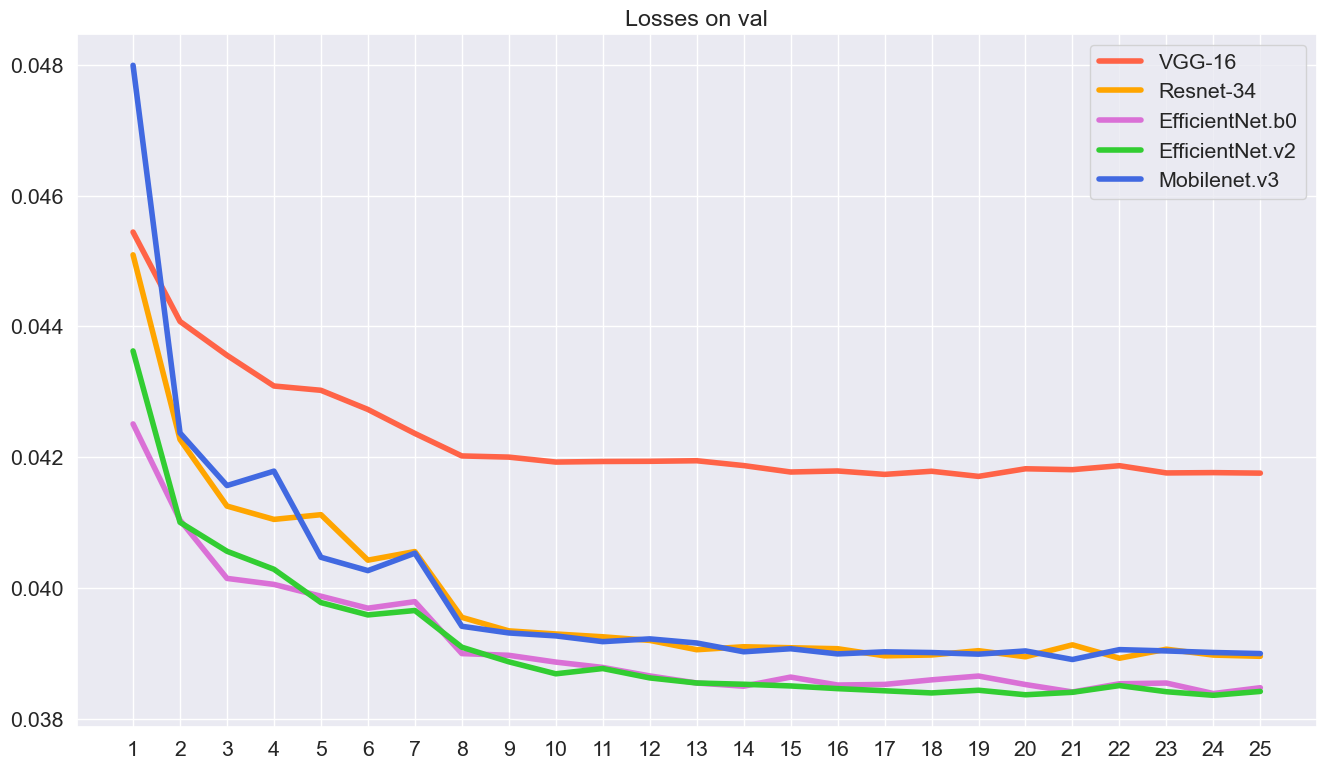

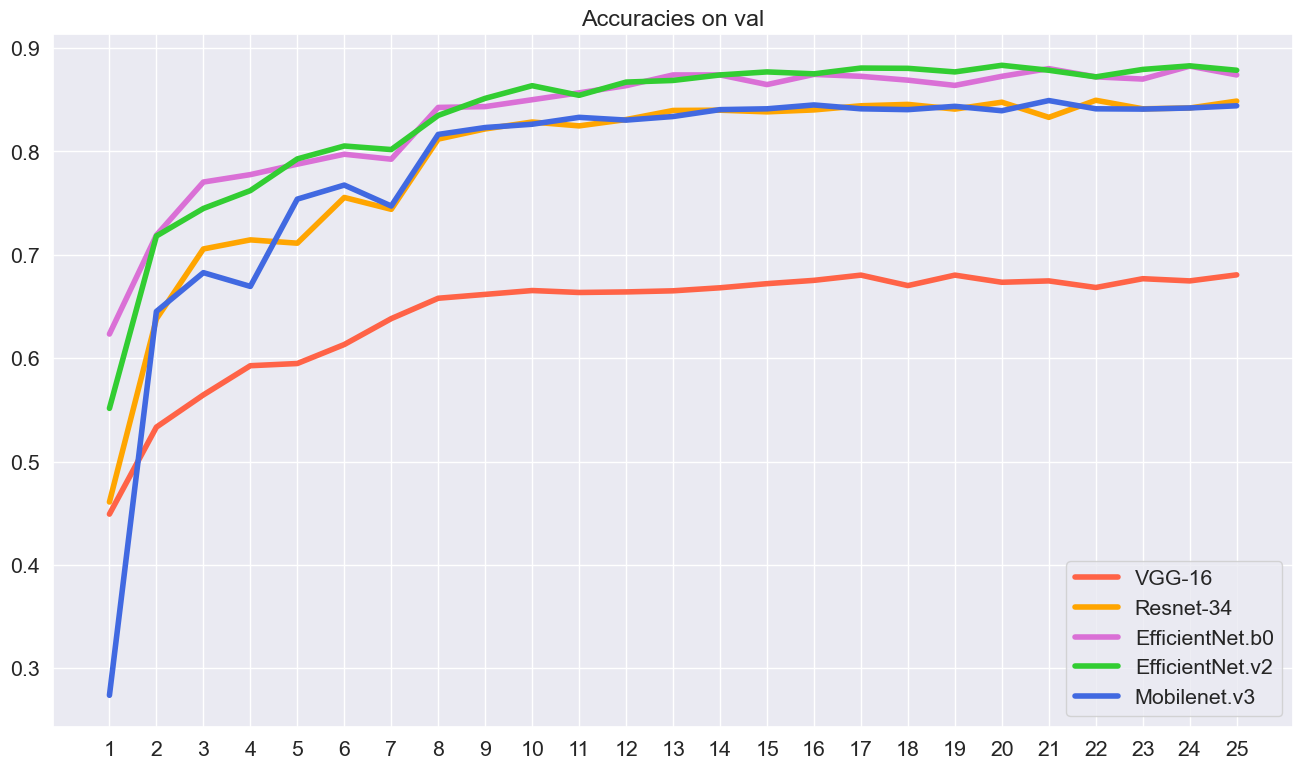

In [11]:
baselines.comparison_plots(losses, accs, model_names)